In [10]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Load the dataset
df = pd.read_csv('../Data/raw_analyst_ratings.csv')

# Drop unnecessary columns
df = df[['headline']]  # Keep only 'headline'

# Download VADER lexicon if not already available
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
df['sentiment_score'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Optional: Save the results to a new CSV
# df.to_csv('../Data/processed_analyst_ratings.csv', index=False)

# Display the first few rows of the processed DataFrame
print(df[['headline', 'sentiment_score', 'sentiment']].head())

[nltk_data] Downloading package vader_lexicon to C:\Users\biement
[nltk_data]     fanteye\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                            headline  sentiment_score  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   

  sentiment  
0   neutral  
1   neutral  
2   neutral  
3   neutral  
4  positive  


In [11]:
# Select specific columns to save
df[['headline', 'sentiment_score', 'sentiment']].to_csv('../Data/processed_analyst_ratings.csv', index=False)

In [14]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define the columns
table.field_names = ["Headline", "Sentiment Score", "Sentiment"]

# Add the rows for the first 10 entries
for index, row in df.head(10).iterrows():
    table.add_row([row['headline'], row['sentiment_score'], row['sentiment']])

# Print the table
print(table)

+--------------------------------------------------------------------------------------------------------------------------+-----------------+-----------+
|                                                         Headline                                                         | Sentiment Score | Sentiment |
+--------------------------------------------------------------------------------------------------------------------------+-----------------+-----------+
|                                         Stocks That Hit 52-Week Highs On Friday                                          |       0.0       |  neutral  |
|                                        Stocks That Hit 52-Week Highs On Wednesday                                        |       0.0       |  neutral  |
|                                              71 Biggest Movers From Friday                                               |       0.0       |  neutral  |
|                                       46 Stocks Moving In Friday's M

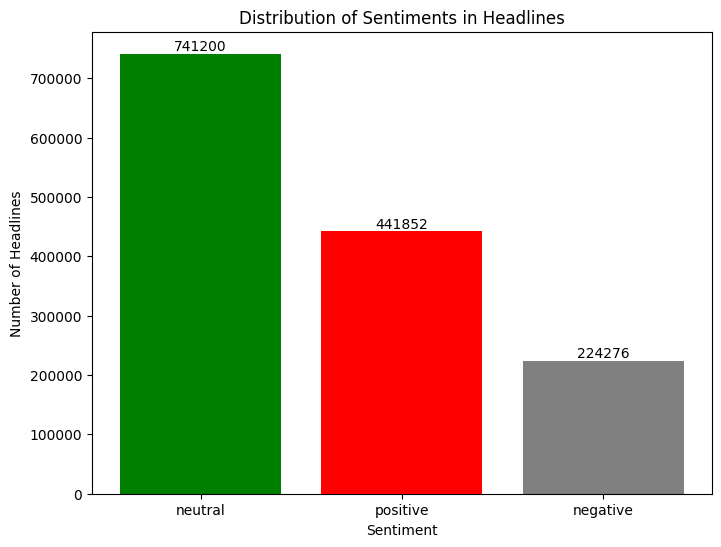

In [18]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts, color=['green', 'red', 'gray'])

# Add title and labels
plt.title('Distribution of Sentiments in Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')

# Add the exact number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

# Display the plot
plt.show()

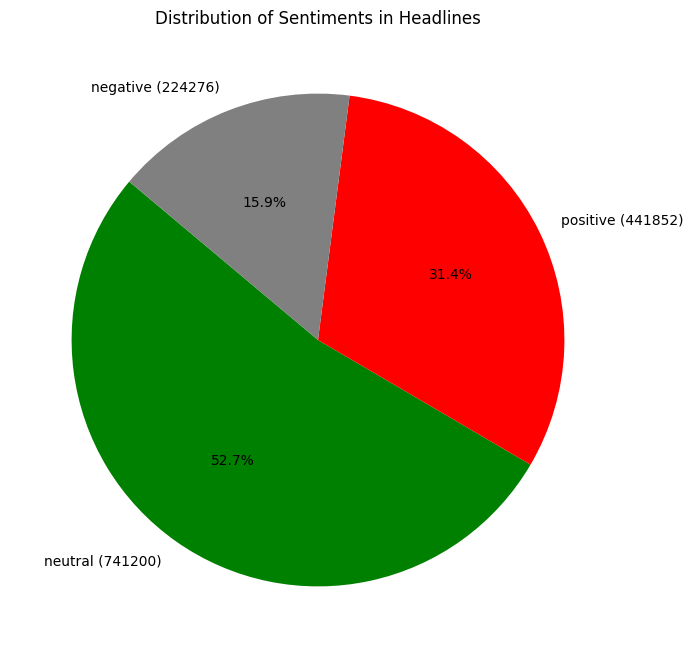

In [19]:
# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Prepare the labels with counts
labels = [f'{sentiment} ({count})' for sentiment, count in zip(sentiment_counts.index, sentiment_counts)]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', colors=['green', 'red', 'gray'], startangle=140)

# Add title
plt.title('Distribution of Sentiments in Headlines')

# Display the plot
plt.show()


In [5]:
import pandas as pd
from prettytable import PrettyTable

df = pd.read_csv('../Data/raw_analyst_ratings.csv')
# Group by 'publisher' and count the number of articles
publisher_counts = df['publisher'].value_counts()

# Categorize headlines
def categorize_headline(headline):
    if 'earnings' in headline.lower():
        return 'Earnings Report'
    elif 'price target' in headline.lower():
        return 'Price Target Change'
    elif 'moving' in headline.lower() or 'high' in headline.lower():
        return 'Stock Movement'
    else:
        return 'Other'

# Apply the function and group by 'publisher' and 'headline_category'
df['headline_category'] = df['headline'].apply(categorize_headline)
distribution = df.groupby(['publisher', 'headline_category']).size().unstack().fillna(0)

# Sort by total articles and reorder columns
distribution['Total'] = distribution.sum(axis=1)
distribution = distribution.sort_values('Total', ascending=False).drop(columns=['Total'])
distribution = distribution[['Earnings Report', 'Price Target Change', 'Stock Movement', 'Other']].astype(int)

# Create a PrettyTable object
table = PrettyTable()

# Add column names
table.field_names = ["Publisher", "Earnings Report", "Price Target Change", "Stock Movement", "Other"]

# Add rows to the table
for index, row in distribution.iterrows():
    table.add_row([index, row['Earnings Report'], row['Price Target Change'], row['Stock Movement'], row['Other']])

# Print the PrettyTable
print("Publisher Headline Distribution by Category")
print(table)

Publisher Headline Distribution by Category
+------------------------------------------------+-----------------+---------------------+----------------+--------+
|                   Publisher                    | Earnings Report | Price Target Change | Stock Movement | Other  |
+------------------------------------------------+-----------------+---------------------+----------------+--------+
|                 Paul Quintaro                  |       2364      |         3010        |      6715      | 216284 |
|                   Lisa Levin                   |      20931      |         4694        |     54399      | 106955 |
|               Benzinga Newsdesk                |       5068      |         2978        |     28631      | 113807 |
|                 Charles Gross                  |       7628      |          78         |      6442      | 82584  |
|                 Monica Gerson                  |      19510      |         547         |     16010      | 46313  |
|                  E